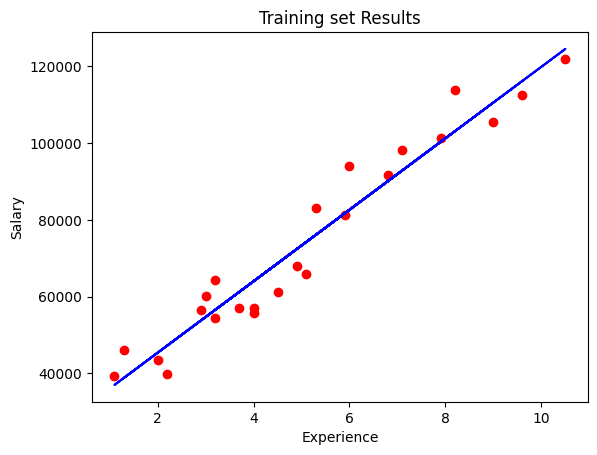

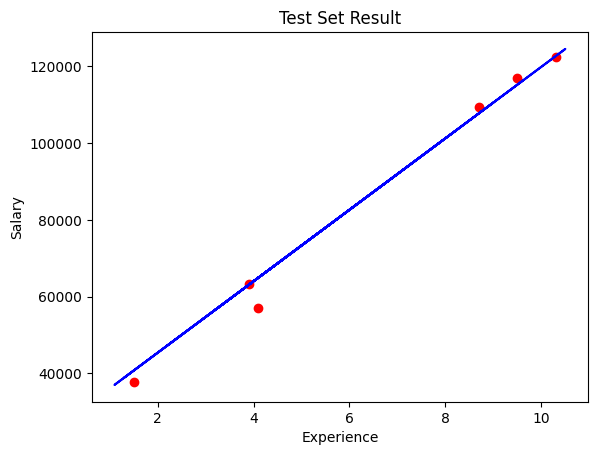

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

dataset = pd.read_csv ('Salary_Data.csv')

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(x_train, y_train)
regressor.predict(x_test)

#visualizing the Training set results :-

plt.scatter(x_train, y_train, color = 'red') 
plt.plot(x_train, regressor.predict(x_train), color = 'blue') 
plt.title('Training set Results')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

#9) visualizing the Test set results :-

plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_train, regressor.predict (x_train), color = 'blue')
plt.title('Test Set Result')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
csv = '50_Startups.csv'
df = pd.read_csv(csv)

# Separate features and target
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Define categorical column indices
cat_columns = [3]
cat_columns_names = [list(df.columns)[i] for i in cat_columns]

# Define column transformer
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), cat_columns),
    ('scaler', StandardScaler(), [0, 1, 2]),
], remainder='passthrough')

# Transform features
X = ct.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Print results
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


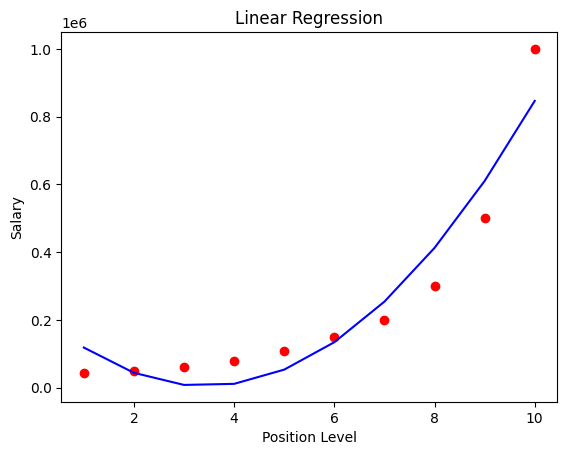

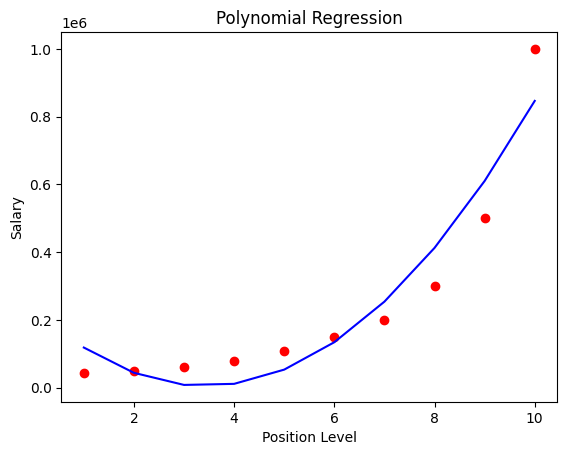

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# load the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# separate the independent and dependent variables
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# fit a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

# plot the results of linear regression
plt.scatter(x, y, color='red') 
plt.plot(x, lin_reg.predict(x_poly), color='blue') 
plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# plot the results of polynomial regression
plt.scatter(x, y, color='red') 
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separate the features and target variable
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Decision Tree Regression Model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Predicting salary of an employee with 7.5 years of experience
print(regressor.predict([[7.5]]))

# Standardize the feature matrix for Classification Model
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Decision Tree Classification Model
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_std, y)

# Test set results
X_test_std = sc.transform(X)
y_pred = classifier.predict(X_test_std)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y.reshape(len(y), 1)), 1))

# Predicting new result
new_data = sc.transform([[7.5]])
print(classifier.predict(new_data))

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print(cm)
print('Accuracy:', accuracy_score(y, y_pred))


[200000.]
[[  45000   45000]
 [  50000   50000]
 [  60000   60000]
 [  80000   80000]
 [ 110000  110000]
 [ 150000  150000]
 [ 200000  200000]
 [ 300000  300000]
 [ 500000  500000]
 [1000000 1000000]]
[300000]
[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
Accuracy: 1.0


In [18]:
#6) K-Nearest Neighbour :-
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier (n_neighbors =5, metric ='minkowski', p=2) 
classifier.fit (x_train, y_train)

 
# Predicting new results
new_prediction = classifier.predict(sc.transform([[30, 87000]]))
print(new_prediction)

# Test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[0]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]
[[52  6]
 [ 7 15]]
0.8375


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values



from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

classifier.fit (x_train, y_train)


# Predicting new results
new_prediction = classifier.predict(sc.transform([[30, 87000]]))
print(new_prediction)

# Test set results
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)


In [ ]:
import pandas as pd 
import numpy as np 
import tensorflow as tf



dataset = pd.read_csv ('Churn_Modelling.csv') 
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
X[:,2]= le.fit_transform (X[:,2])

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer (transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')

X = np.array (ct.fit_transform (X))

from sklearn preprocessing import Standard Scaler

se Standard Scaler() x.train sc. fit. transform (x. train)
X-test = sc. transform (x_test)

f) Initialize ANN:-

ann = tf. keras models. Sequential ()

9) Adding input layer and 1st Hidden layer :- ann.add(tf.keras Layers Dense (units = 6, activation = xelu'))

h) Adding second hidden layer : :-

ann.add(tf keras layers. Dense (units s = 6 , activation = 'Relu'))

i) Adding the output layer 8- ann add (tf keras. Layers. Dense (units s = 1 , activation = 'sigmoid'))

j) Training the ANN:- (i) Compiling the ANN :-

ann.compile (optimizer = 'adam', Loss = 'binary_cross entropy, metrics = ['accuracy'])

(i) Training the ANN on training set - ann fit (x-train, y-train, batch_size si * 2e = 32 , epochs = 100)
k) Making Predictions and Evaluating the Model :-

e.g. Geography = France, Credit Score = 600, Gender = Male, Age = 40 years, Tenure = 3 years, Balance = 60000, Number of Products = 2, Credit Card = Yes,

Active Member = Yes, Estimated Salary

= 50000,

Goodbye = ?

print (ann predict (sc. transform ([[1,0,0, 600, 1, 40, 3, 60000, 2, +, 1, 50000]))))

Predicting the Test Set results :-

y-pred = ann predict (X-test)

y-pred (y-pred > 0.5)

Print (np.concatenate (ly-pred.reshape(lenly-pred), +), y-test.reshape(len(

y-test),1)),1))

m) Make Confusion Matrix :-

from sklearn metrics import confusion-matrix, accuracy-score

cm = confusion-matrix (y-test, y-pred)

accuracy-score (y-test, y-pred)